In [1]:
#importing the necessary libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the csv file
Loan = pd.read_csv("loan_data.csv")

In [3]:
#displaying the first five rows
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
Loan.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
Loan= Loan.dropna()

In [7]:
#converting the loan status data into numerical data
Loan.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

C:\Users\5ptal\AppData\Local\Temp\ipykernel_21412\1581702758.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Loan.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [8]:
Loan= Loan.replace(to_replace='3+',value=4)

<Axes: xlabel='Education', ylabel='count'>

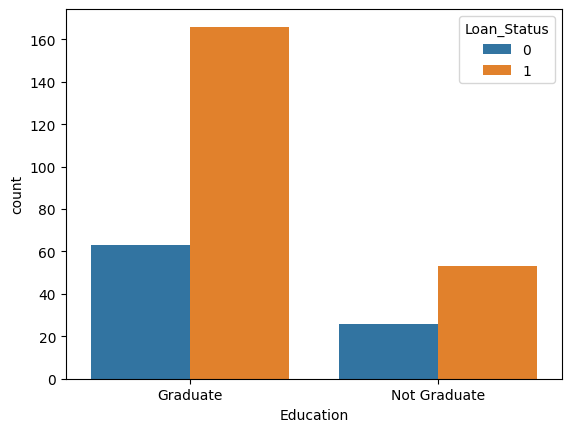

In [9]:
# showing the relation between education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=Loan)

In [10]:
#Replacing all text data with numerical values
Loan.replace({'Gender': {'Male':0,'Female':1},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},
                   'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Self_Employed':{'Yes':1,'No':0}} ,inplace=True)

C:\Users\5ptal\AppData\Local\Temp\ipykernel_21412\1318889970.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Loan.replace({'Gender': {'Male':0,'Female':1},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},


In [11]:
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [12]:
#separating the dependent and independent variables
X= Loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y= Loan['Loan_Status']

In [13]:
#slpitting to train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [14]:
#Train the model SVM
model= svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [15]:
#Accuracy of the model
X_train_predict= model.predict(X_train)
accuracy= accuracy_score(Y_train,X_train_predict)
print('Accuracy for train data:',accuracy)

Accuracy for train data: 0.8373983739837398


In [16]:
#Accuracy of the model
X_test_predict= model.predict(X_test)
accuracy= accuracy_score(Y_test,X_test_predict)
print('Accuracy for test data:',accuracy)

Accuracy for test data: 0.8387096774193549


Confusion Matrix:
[[ 8 10]
 [ 0 44]]


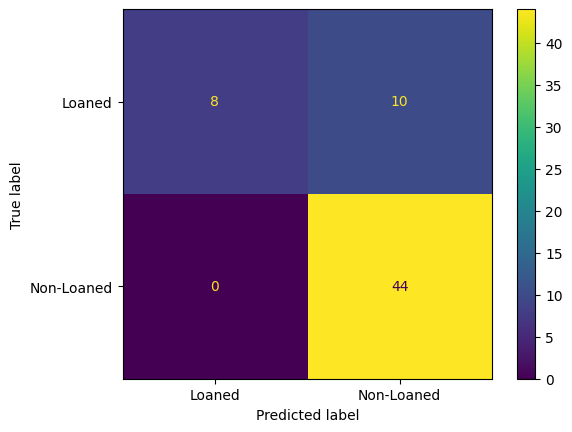

In [17]:
# Print confusion matrix
conf_matrix_nb = confusion_matrix(Y_test, X_test_predict)
print("Confusion Matrix:")
print(conf_matrix_nb)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_nb, display_labels = ["Loaned", "Non-Loaned"])
# display matrix
cm_display.plot()
plt.show()